In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


from clean import clean_data
from feature_engineering import feature_engineering, missing_values
from model import *

warnings.filterwarnings("ignore")
%matplotlib inline

# Сделаем автоподгрузку всех изменений при перепрогонке ячейки
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("table_laptops.csv")
# очистка данных
df = clean_data(df)

# заполнение пропусков в данных
df = missing_values(df)

# создание новых признаков/метрик
df = feature_engineering(df)

df.head()

price    bonus  credit  \
0   79990.0  11999.0  2273.0   
1  118202.0  17731.0  3359.0   
2   94990.0  14249.0  2700.0   
3   40990.0   2870.0  1165.0   
4   51490.0   8239.0  1463.0   

                                               title  review  \
0     Ноутбук Huawei MateBook B3-520 Gray (53013fcn)    17.0   
1  Ноутбук Acer Nitro 5 AN515-58 Black (NH.QLZCD....    10.0   
2  Ноутбук Apple MacBook Air 13" M1/8Gb/256Gb/Spa...   999.0   
3          Ноутбук Lenovo IdeaPad Slim 3 15IRU8 Gray    97.0   
4  Ноутбук Honor MagicBook X16 2024 DOS Gray (530...    71.0   

                        merchant_name  brands manufacturer  loan_closure  
0           Мегамаркет Москва Пушкино  Huawei   Мегамаркет            36  
1          Мегамаркет Москва Томилино    Acer   Мегамаркет            36  
2           Мегамаркет Москва Пушкино   Apple   Мегамаркет            36  
3            Ситилинк Москва Доставка  Lenovo     Ситилинк            36  
4  Click & Buy (со склада МегаМаркет)   Honor        Click            36

In [3]:
encoded_df = encoding(data=df, categorical_features=["brands"], encoder_method="one_hot")
encoded_df.head(5)

price    bonus  credit  \
0   79990.0  11999.0  2273.0   
1  118202.0  17731.0  3359.0   
2   94990.0  14249.0  2700.0   
3   40990.0   2870.0  1165.0   
4   51490.0   8239.0  1463.0   

                                               title  review  \
0     Ноутбук Huawei MateBook B3-520 Gray (53013fcn)    17.0   
1  Ноутбук Acer Nitro 5 AN515-58 Black (NH.QLZCD....    10.0   
2  Ноутбук Apple MacBook Air 13" M1/8Gb/256Gb/Spa...   999.0   
3          Ноутбук Lenovo IdeaPad Slim 3 15IRU8 Gray    97.0   
4  Ноутбук Honor MagicBook X16 2024 DOS Gray (530...    71.0   

                        merchant_name manufacturer  loan_closure  \
0           Мегамаркет Москва Пушкино   Мегамаркет            36   
1          Мегамаркет Москва Томилино   Мегамаркет            36   
2           Мегамаркет Москва Пушкино   Мегамаркет            36   
3            Ситилинк Москва Доставка     Ситилинк            36   
4  Click & Buy (со склада МегаМаркет)        Click            36   

   brands_brands_ASUS  brands_brands_Acer  ...  brands_brands_Lenovo  \
0                   0                   0  ...                     0   
1                   0                   1  ...                     0   
2                   0                   0  ...                     0   
3                   0                   0  ...                     1   
4                   0                   0  ...                     0   

   brands_brands_MAIBENBEN  brands_brands_MSI  brands_brands_Machenike  \
0                        0                  0                        0   
1                        0                  0                        0   
2                        0                  0                        0   
3                        0                  0                        0   
4                        0                  0                        0   

   brands_brands_OSIO  brands_brands_Samsung  brands_brands_Tecno  \
0                   0                      0                    0   
1                   0                      0                    0   
2                   0                      0                    0   
3                   0                      0                    0   
4                   0                      0                    0   

   brands_brands_Thunderobot  brands_brands_Xiaomi  brands_brands_iRU  
0                          0                     0                  0  
1                          0                     0                  0  
2                          0                     0                  0  
3                          0                     0                  0  
4                          0                     0                  0  

[5 rows x 34 columns]

In [4]:
X = encoded_df.drop(columns=["title", "merchant_name", "manufacturer", "price"])
y = encoded_df["price"]

In [5]:
model = linear_regression(X, y)

2. Тесты на гетероскедастичность, мультиколлинеарность

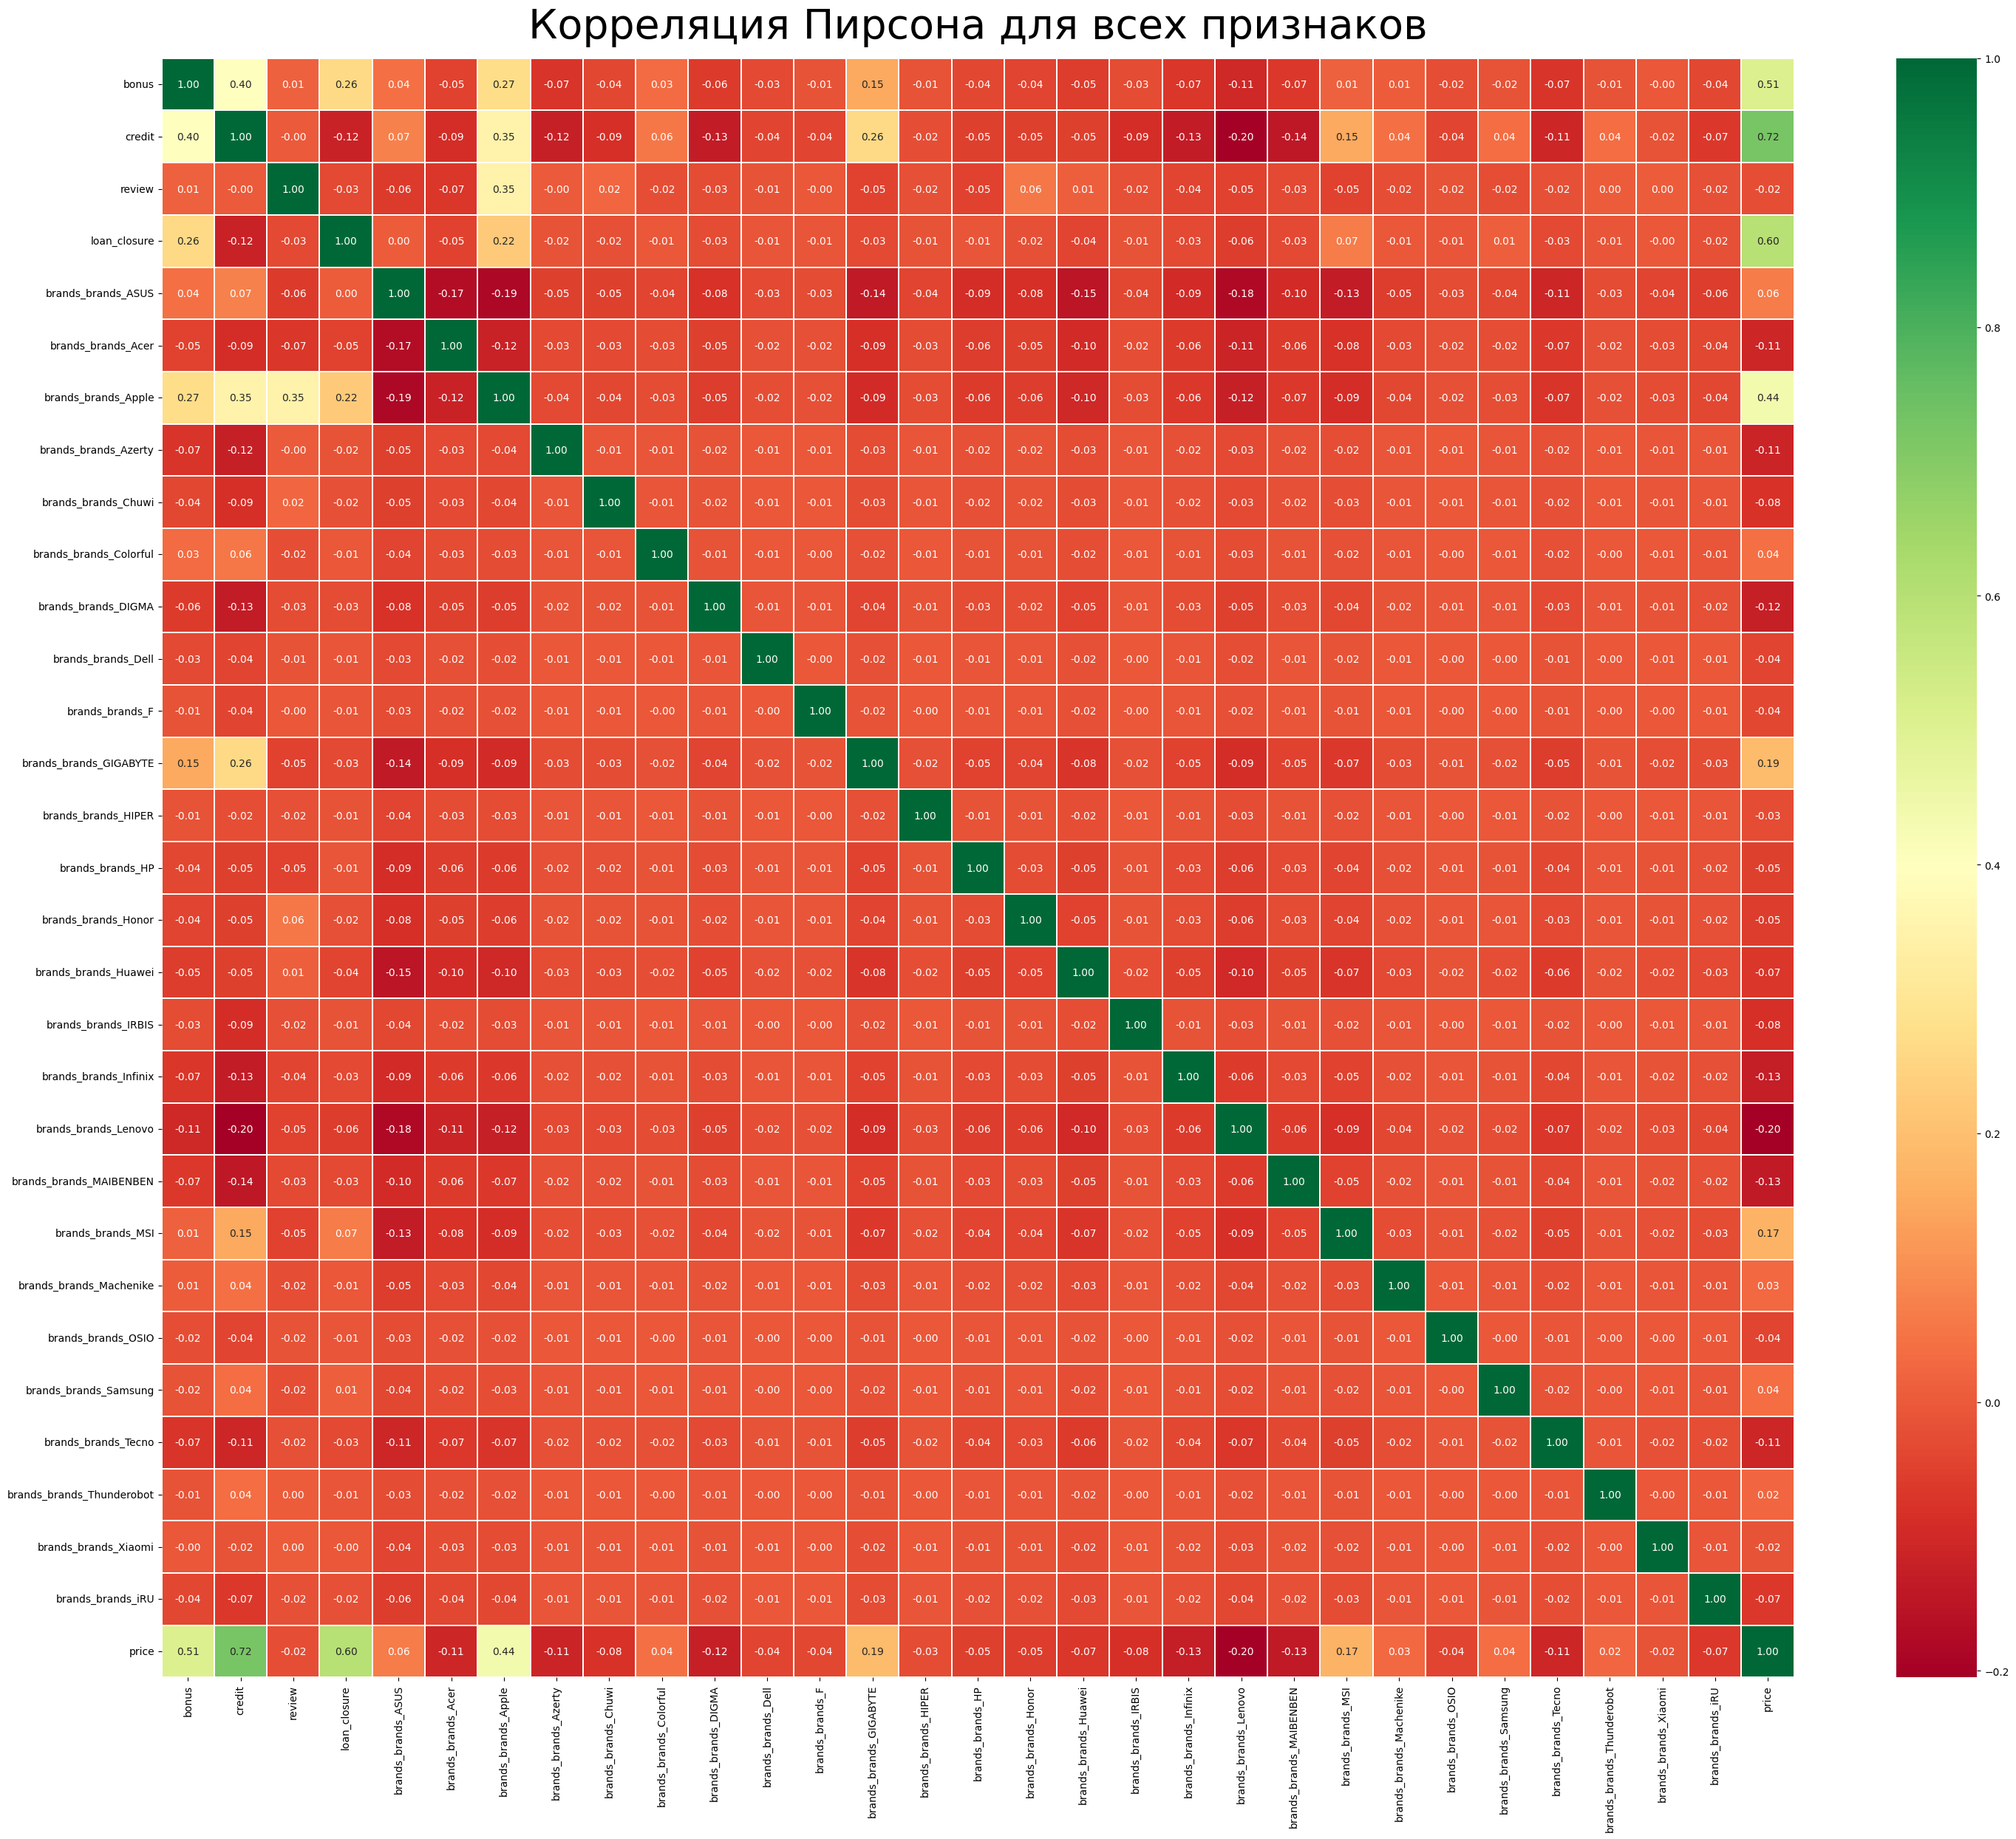

In [6]:
# необходимо отметить, что строим корреляцию также для переведенных в числовой формат категориальных данных

corr_matrix = pd.concat([X, y], axis=1).corr()

# построим тепловую матрицу корреляций пирсона
plt.figure(figsize=(30, 25))
sns.heatmap(data=corr_matrix, annot=True, cmap="RdYlGn", linewidths=0.2, fmt=".2f")
plt.title(
    "Корреляция Пирсона для всех признаков", fontsize=40, pad=20
)  # Установка размера заголовка и расстояния между заголовком и графиком

plt.tight_layout()  # Установка расстояния между заголовком и графиком
plt.show()

In [7]:
# МНК
model, summary = linear_regression(X, y)
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.873e+07
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:41:23   Log-Likelihood:                -66524.
No. Observations:                9484   AIC:                         1.331e+05
Df Residuals:                    9454   BIC:                         1.333e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Модель линейной регрессии обладает высоким уровнем объясненной изменчивости, что подтверждается значением R-квадрат равным 1.000. Это указывает на то, что модель хорошо соответствует данным, что может быть результатом переобучения, особенно при наличии большого количества предикторов.

Параметр const представляет собой базовый уровень зависимой переменной (price), который составляет -5.42e+04. Остальные коэффициенты показывают вклад каждого предиктора в объяснение изменчивости зависимой переменной при удержании других предикторов постоянными.

Например, коэффициент для переменной credit составляет 35.1673, что означает, что при увеличении на одну единицу переменной credit, цена увеличивается на 35.1673 единиц, удерживая все остальные переменные постоянными. 

Похожим образом, для других предикторов можно интерпретировать их влияние на цену. Например, brands_brands_ASUS, brands_brands_Acer, brands_brands_Apple и другие переменные, относящиеся к бренду, имеют отрицательные коэффициенты, что может указывать на то, что принадлежность к этим брендам связана с более низкой ценой товара по сравнению с другими брендами.

Заметим также, что для некоторых переменных p-value превышает уровень значимости 0.05, что означает, что эти переменные могут быть не значимы для модели. Возможно, стоит рассмотреть удаление этих переменных из модели или применение других методов отбора признаков.

In [8]:
# тест на на гетероскедастичность
test_heteroskedasticity(model)

{'Breusch-Pagan Test': {'LM Statistic': 12.237174098207184,
  'LM-Test p-value': 0.9983136508519876,
  'F Statistic': 0.42118017831974086,
  'F-Test p-value': 0.9973164581177542},
 'White Test': {'LM Statistic': 9476.543529231965,
  'LM-Test p-value': 0.0,
  'F Statistic': 87347.39885594588,
  'F-Test p-value': 0.0}}

In [9]:
test_multicollinearity(X)

Feature       VIF        TW
0                       const  0.000000  0.000000
1                       bonus  1.376466  1.894660
2                      credit  2.028127  4.113300
3                      review  1.222201  1.493776
4                loan_closure  1.337800  1.789710
5          brands_brands_ASUS       inf       inf
6          brands_brands_Acer       inf       inf
7         brands_brands_Apple       inf       inf
8        brands_brands_Azerty       inf       inf
9         brands_brands_Chuwi       inf       inf
10     brands_brands_Colorful       inf       inf
11        brands_brands_DIGMA       inf       inf
12         brands_brands_Dell       inf       inf
13            brands_brands_F       inf       inf
14     brands_brands_GIGABYTE       inf       inf
15        brands_brands_HIPER       inf       inf
16           brands_brands_HP       inf       inf
17        brands_brands_Honor       inf       inf
18       brands_brands_Huawei       inf       inf
19        brands_brands_IRBIS       inf       inf
20      brands_brands_Infinix       inf       inf
21       brands_brands_Lenovo       inf       inf
22    brands_brands_MAIBENBEN       inf       inf
23          brands_brands_MSI       inf       inf
24    brands_brands_Machenike       inf       inf
25         brands_brands_OSIO       inf       inf
26      brands_brands_Samsung       inf       inf
27        brands_brands_Tecno       inf       inf
28  brands_brands_Thunderobot       inf       inf
29       brands_brands_Xiaomi       inf       inf
30          brands_brands_iRU       inf       inf

По результатам корреляционного анализа было обнаружено отсутствие мультиколлинеарности между непрерывными признаками. Однако, для категориальных признаков (с 5 по 30) использование данных тестов не является корректным.

Анализ показал различные результаты для двух тестов: Breusch-Pagan 'F-Test p-value': 0.9973164581177542 и White Test F-Test p-value': 0.0. Однако, при выборе предпочтительнее использовать результаты теста Уайта, который указывает на наличие гетероскедастичности. Для коррекции этого эффекта предлагается использовать модель с взвешенными наименьшими квадратами, а также использование методов робастной регрессии.


In [10]:
# параметры модели с использованием взвешенных наименьших квадратов
wls_model = weighted_least_squares(X, y)
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.359e+11
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:41:28   Log-Likelihood:                -44338.
No. Observations:                9484   AIC:                         8.874e+04
Df Residuals:                    9454   BIC:                         8.895e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

3. 

1. **Промежуточная модель:** В этой модели использовался набор данных, который содержал информацию о ценах на ноутбуки. Однако, для анализа было решено исключить ноутбуки, цены которых превышали 250 000 рублей, поскольку они составляли менее 1% от общего числа ноутбуков и могли искажать общую картину.

2. **Финальная модель:** Эта модель также использовала тот же набор данных, но в отличие от промежуточной модели, она не проводила исключение ноутбуков с ценой выше 250 000 рублей.

**Метрики**

Для оценки эффективности моделей использовались следующие метрики:

1. **MSE (Mean Squared Error):** Это среднее значение квадратов отклонений предсказанных значений от истинных. Чем меньше это значение, тем лучше.

2. **MAE (Mean Absolute Error):** Это среднее абсолютное значение отклонений предсказанных значений от истинных. Опять же, чем меньше, тем лучше.

3. **MAPE (Mean Absolute Percentage Error):** Это среднее абсолютное значение процентного отклонения предсказанных значений от истинных. Здесь также стремимся к минимизации.

4. **R2-score:** Это коэффициент детерминации, который измеряет пропорцию вариации зависимой переменной, объясняемую независимыми переменными в модели. Значение близкое к 1 указывает на хорошую подгонку модели.

5. **RMSE (Root Mean Squared Error):** Это квадратный корень из MSE, также используется для оценки точности модели.

In [11]:
y_pred = wls_model.predict(sm.add_constant(X))
metric_model(y_pred, y)

Metrics
MSE       72562.226889
MAE          63.079909
MAPE          0.000859
R2-score      0.999983
RMSE        269.373768

In [12]:
# Создаем маску для значений y, меньших 300_000 (Отбираем ноутбуки, у которых цена превышает этого порога)
mask_y = y < 250_000

# Применяем маску к X, чтобы отобрать строки
X_filtered = X.loc[mask_y]

# Применяем маску к y, чтобы отобрать значения
y_filtered = y.loc[mask_y]


wls_model_2 = weighted_least_squares(X_filtered, y_filtered)
y_pred_2 = wls_model.predict(sm.add_constant(X_filtered))


metric_model(y_pred_2, y_filtered)

Metrics
MSE       70811.460143
MAE          56.823954
MAPE          0.000863
R2-score      0.999970
RMSE        266.104228

**Отчет о выборе финальной модели в сравнении с промежуточной моделью**

**Результаты сравнения**

| Модель          | MSE        | MAE       | MAPE     | R2-score  | RMSE     |
|-----------------|------------|-----------|----------|-----------|----------|
| Промежуточная   | 72562.226  | 63.079    | 0.000859 | 0.999983  | 269.374  |
| Финальная       | 70811.460  | 56.824    | 0.000863 | 0.999970  | 266.104  |

**Выводы**

Сравнивая метрики обеих моделей, можно отметить, что все метрики для финальной модели оказались лучше по сравнению с промежуточной моделью. В частности, MSE, MAE, и RMSE уменьшились, а R2-score увеличился. Это указывает на то, что финальная модель предсказывает цены на ноутбуки с большей точностью и эффективностью.

Таким образом, выбор был сделан в пользу финальной модели, поскольку она демонстрировала лучшие показатели всех рассмотренных метрик, что подтверждает её высокую прогностическую способность.